In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/iphone_purchase_records.csv")

In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
f=lambda x:0 if x=="Male" else 1
data["Gender"]=data["Gender"].apply(f)  ## 0 is for male and 1 is for female 

In [7]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   Salary           400 non-null    int64
 3   Purchase Iphone  400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [9]:
data.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [10]:
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

## EDA

<Axes: xlabel='Gender', ylabel='count'>

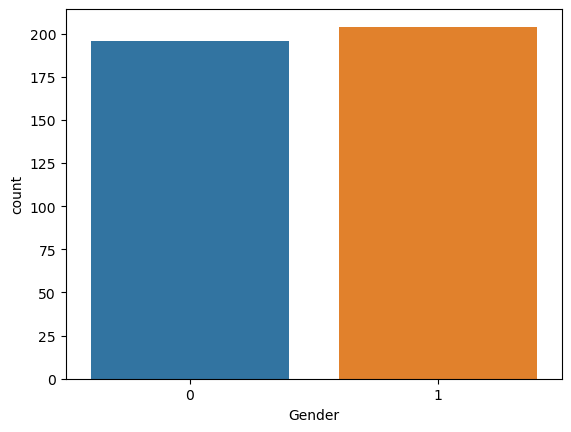

In [42]:
sns.countplot(x=data.Gender,data=data)

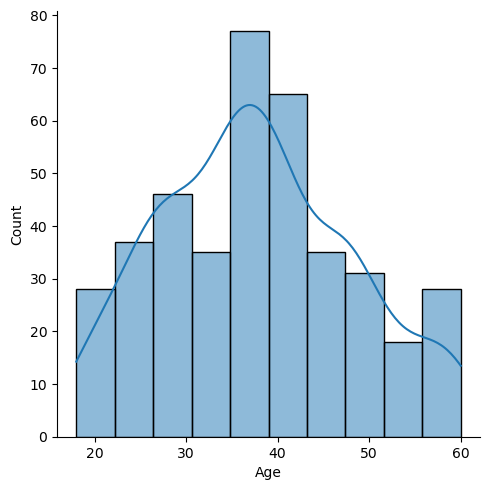

In [12]:
sns.displot(x=data.Age,data=data,kde=True)

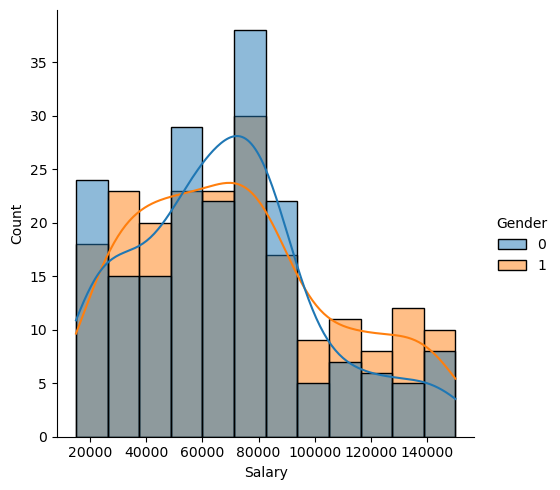

In [45]:
sns.displot(x=data.Salary,hue=data.Gender,data=data,kde=True)

<Axes: xlabel='Age', ylabel='Salary'>

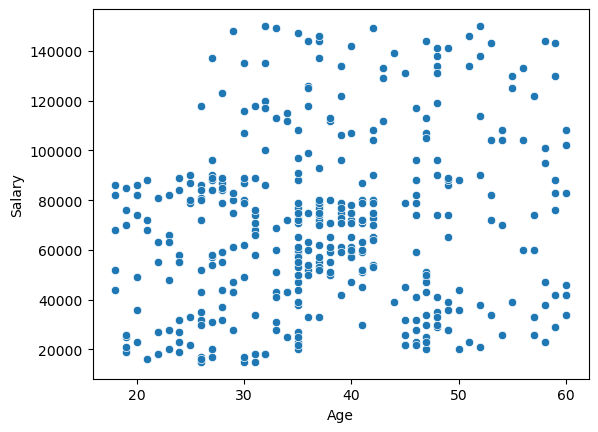

In [15]:
sns.scatterplot(x=data.Age,y=data.Salary,data=data)

<Axes: xlabel='Purchase Iphone', ylabel='count'>

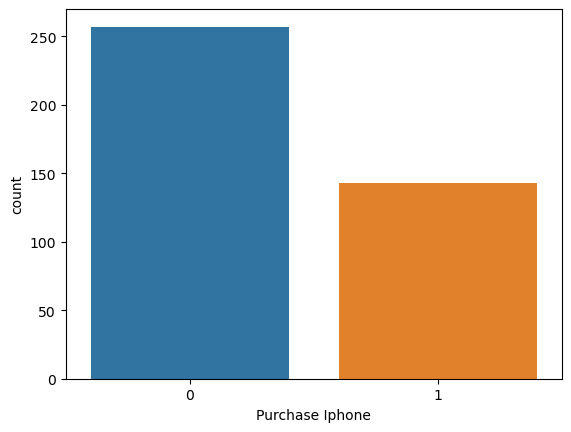

In [46]:
sns.countplot(x=data["Purchase Iphone"],data=data)

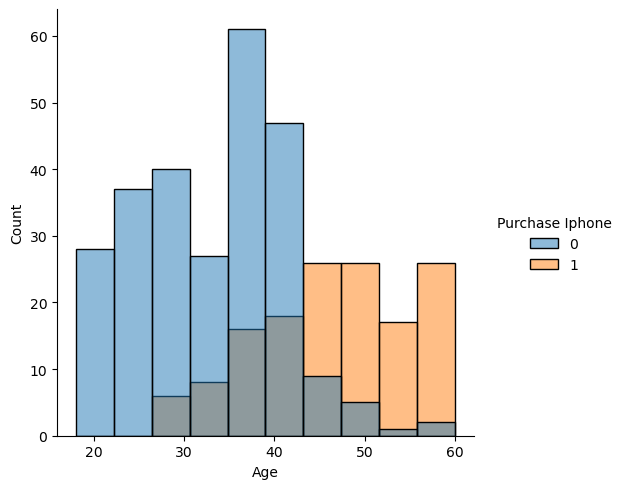

In [47]:
sns.displot(x=data.Age,hue=data["Purchase Iphone"],data=data)

<Axes: >

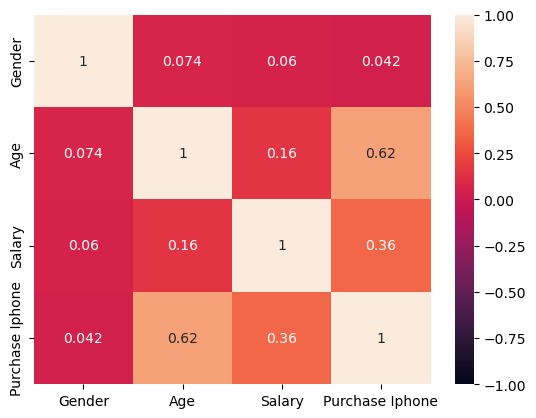

In [48]:
sns.heatmap(data.corr(),vmin=-1,annot=True)

## KNN Classification model because we have to predict customer will purchase iphone yes or no

In [17]:
data.head(2)

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0


In [18]:
y=data["Purchase Iphone"]
x=data[["Gender","Age","Salary"]]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
error=[]
k=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    err=1-round(model.score(x_train,y_train),2)
    error.append(err)
    k.append(i)

In [25]:
pd.DataFrame({"error":error,"k":k})

,error,k
0,0.00,1
1,0.12,2
2,0.10,3
3,0.14,4
4,0.12,5
5,0.15,6
6,0.13,7
7,0.15,8
8,0.15,9
9,0.17,10


In [26]:
## k=3 having less error n_neighnors=3

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=3)

In [34]:
model=knn.fit(x_train,y_train)

In [37]:
pred=model.predict(x_test)
pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [35]:
print("training score=",model.score(x_train,y_train))

training score= 0.9


In [36]:
from sklearn.metrics import accuracy_score

In [38]:
print("testing score=",accuracy_score(y_test,pred))

testing score= 0.8


In [39]:
x_test.head(2)

,Gender,Age,Salary
209,1,46,22000
280,1,59,88000


In [41]:
x_test["actual_Purchase"]=y_test
x_test["predicted_purchase"]=pred
x_test

,Gender,Age,Salary,actual_Purchase,predicted_purchase
209,1,46,22000,0,1
280,1,59,88000,1,1
33,1,28,44000,0,0
210,1,48,96000,1,1
93,1,29,28000,0,0
...,...,...,...,...,...
246,1,35,50000,0,0
227,0,56,133000,1,0
369,1,54,26000,1,1
176,1,35,47000,0,0
